In [1]:
import numpy as np

USD_to_INR    = 72
discount_rate = .09
INR_per_MW_to_USD_per_kW = 10000*(1/USD_to_INR)

def _CRF(r, N):
    return r*((1 + r)**N)/((1 + r)**N - 1)

# Specified Capacity

In [2]:
# Nuclear
capex    = INR_per_MW_to_USD_per_kW*11.7
opex     = INR_per_MW_to_USD_per_kW*0.43
lifetime = 30
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

1624.9999999999998 59.72222222222222 30 0.0973363513908898
158231.2932324181


In [3]:
# Hydro Storage
capex    = INR_per_MW_to_USD_per_kW*(8.3 + 8.04)/2.
opex     = INR_per_MW_to_USD_per_kW*(0.91 + 0.24)/2.
lifetime = 40
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

1134.7222222222222 79.8611111111111 40 0.09295960922109704
105563.19546338372


In [4]:
# Hydro Pumped 
capex    = INR_per_MW_to_USD_per_kW*(6 + 3.85)/2.
opex     = INR_per_MW_to_USD_per_kW*(0.15 + 0.096)/2.
lifetime = 40
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

684.0277777777777 17.083333333333332 40 0.09295960922109704
63604.03825193096


In [5]:
# Hydro ROR
capex    = INR_per_MW_to_USD_per_kW*10.7
opex     = INR_per_MW_to_USD_per_kW*0.44
lifetime = 40
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

1486.111111111111 61.11111111111111 40 0.09295960922109704
138209.41925913034


In [6]:
# Biomass
capex    = INR_per_MW_to_USD_per_kW*5
opex     = INR_per_MW_to_USD_per_kW*0.1
lifetime = 30
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

694.4444444444445 13.88888888888889 30 0.0973363513908898
67608.57735478457


In [7]:
# Diesel
capex    = INR_per_MW_to_USD_per_kW*4.1
opex     = INR_per_MW_to_USD_per_kW*0.25
lifetime = 25
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

569.4444444444443 34.72222222222222 25 0.10180625051857181
58007.72598974227


In [8]:
# CCGT
capex    = INR_per_MW_to_USD_per_kW*3.47
capex    = INR_per_MW_to_USD_per_kW*5.2
#capex    = INR_per_MW_to_USD_per_kW*5

opex     = INR_per_MW_to_USD_per_kW*0.25
lifetime = 25
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

722.2222222222223 34.72222222222222 25 0.10180625051857181
73561.45870785743


In [9]:
# Wind
capex    = INR_per_MW_to_USD_per_kW*6.66
opex     = INR_per_MW_to_USD_per_kW*0.068
lifetime = 25
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

925.0 9.444444444444445 25 0.10180625051857181
94180.22617412337


In [10]:
# Solar
capex    = INR_per_MW_to_USD_per_kW*4.3
opex     = INR_per_MW_to_USD_per_kW*0.046
lifetime = 25
CRF      = _CRF(discount_rate, lifetime)
print(capex, opex, lifetime, CRF)

annualized = 1000*CRF*capex + opex
print(annualized)

597.2222222222222 6.388888888888888 25 0.10180625051857181
60807.344059702606


In [21]:
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt

# Roof Top Solar PV Cost projections

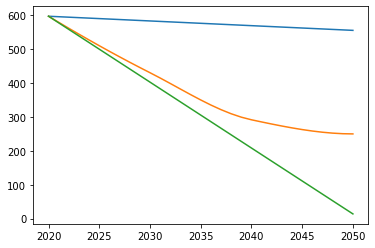

In [31]:
capex_  = np.array([4.3, 3.1, 2.1, 1.8])
period_ = np.array([2020, 2030, 2040, 2050])
# 2050 uncerntaty
upper_ = np.array([4.3, 4.])
lower_ = np.array([4.3, 0.1])
uncertanty_period_ = np.array([2020, 2050])

_f_mean = PchipInterpolator(period_, capex_)
_f_upper = PchipInterpolator(uncertanty_period_, upper_)
_f_lower = PchipInterpolator(uncertanty_period_, lower_)

z = 1e7/1000/USD_to_INR
x_ = np.arange(2020, 2051, 1)

plt.figure()
plt.plot(x_, _f_upper(x_)*z)
plt.plot(x_, _f_mean(x_)*z)
plt.plot(x_, _f_lower(x_)*z)
plt.show()